In [19]:
import pandas as pd
import numpy as np
import math
import datetime
import matplotlib.pyplot as plt
from ipynb.fs.defs.functions import new_route
from ipynb.fs.defs.functions import get_row
from ipynb.fs.defs.functions import get_column
from ipynb.fs.defs.functions import best_index
from ipynb.fs.defs.functions import find_best_position
from ipynb.fs.defs.functions import cities_list
from ipynb.fs.defs.functions import getName

In [2]:
from ipynb.fs.defs.functions import random_schedule_day

table=pd.read_csv("../Dati/orari/route.csv", delimiter=";")
time_table=pd.read_csv("../Dati/orari/route_time.csv", delimiter=";")
dft = pd.read_csv("../Dati/distanze/corrected_times_computed.csv", delimiter=";", encoding = "ISO-8859-1", index_col=0)

In [4]:
random_schedule_day(dft, 6)

['Martignana di Po, Libertà, 64',
 'Soresina, Giacomo Matteotti, 6',
 'Agnadello, Marconi, 6',
 'San Bassano, Mons. Frosi',
 'Soncino, Dante Alighieri, 23',
 'Manerbio, INSURREZIONE NAZIONALE']

In [2]:
dft = pd.read_csv("../Dati/distanze/times_computed.csv", delimiter=";", encoding = "ISO-8859-1", index_col=0)
fur1 = pd.read_csv("../Dati/turni_f/2-opt1_shifts.csv", delimiter=";", encoding = "ISO-8859-1")
fur2 = pd.read_csv("../Dati/turni_f/2-opt2_shifts.csv", delimiter=";", encoding = "ISO-8859-1")
week = ["lunedi", "martedi", "mercoledi", "giovedi", "venerdi"]
lista = []
for day in week:
    lista = lista + list(fur1[day].dropna())
week = ["martedi", "mercoledi", "giovedi"]
for day in week:
    lista = lista + list(fur2[day].dropna())

In [4]:
getName(dft, "Crema")

'Crema, Civerchi, 9'

In [47]:
import matplotlib.pyplot as plt
benchmark = pd.read_csv("../Dati/altro/benchmark.csv", delimiter=";", encoding = "ISO-8859-1", index_col=0)
benchmark

,5,10,15,20,25,30,35
greedy,0.035,0.116,0.278,0.462,0.720,1.044,1.331
LS,0.307,1.084,2.296,4.331,6.534,10.365,13.418
2opt,0.665,5.265,17.679,36.888,74.975,134.065,171.945


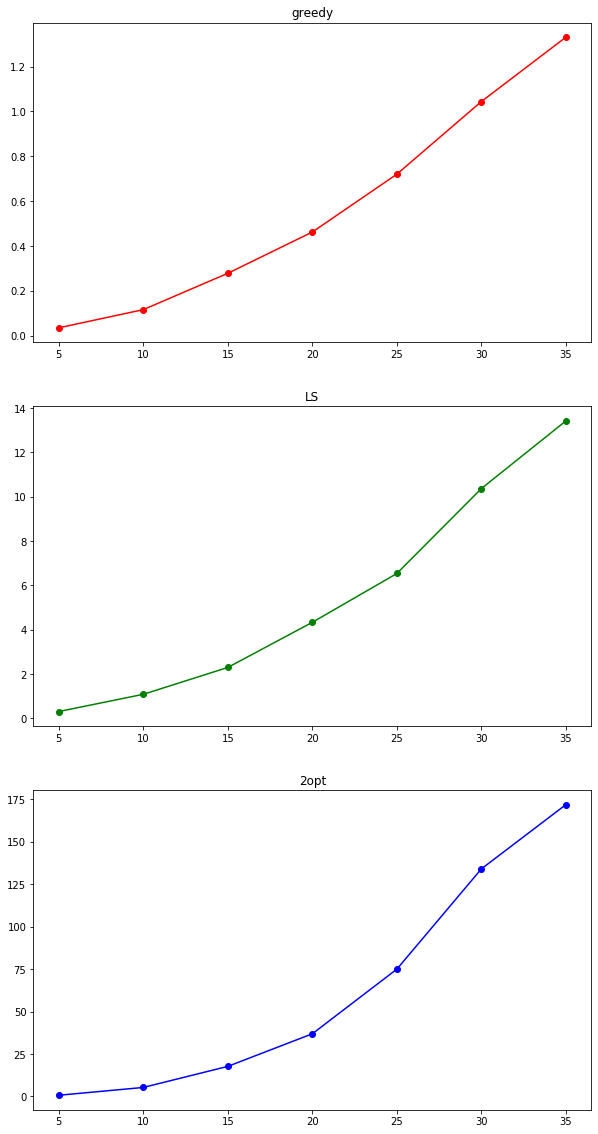

In [48]:
algs = ["greedy", "LS", "2opt"]
colors = ["r", "g", "b"]

plt.figure(figsize=[10,20])
for alg in algs:
#     if(algs.index(alg)<2):
#         plt.ylim([0,14])
    plt.subplot(3,1, algs.index(alg)+1)
    plt.title(alg)
    plt.plot(benchmark.loc[alg], colors[algs.index(alg)]+"o-")
plt.show()

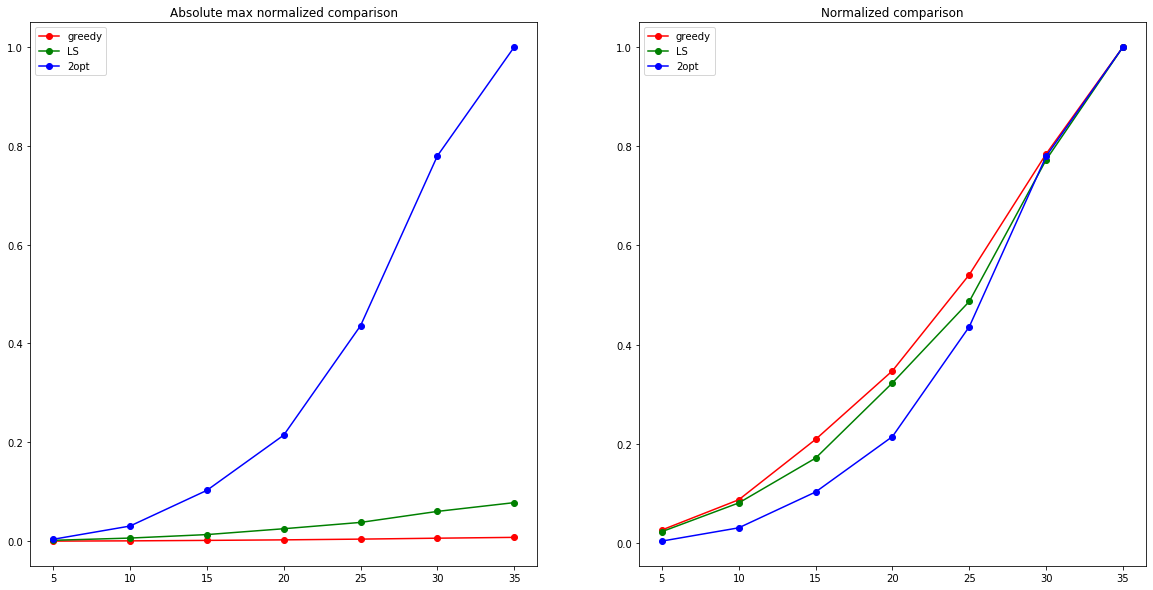

In [49]:
algs = ["greedy", "LS", "2opt"]
colors = ["r", "g", "b"]

plt.figure(figsize=[20,10])
plt.subplot(121)
for alg in algs:
#     if(algs.index(alg)<2):
#         plt.ylim([0,14])
    plt.plot(benchmark.columns,[x/max(benchmark.max()) for x in benchmark.loc[alg]], colors[algs.index(alg)]+"o-")
plt.title("Absolute max normalized comparison")
plt.legend(algs)

plt.subplot(122)
for alg in algs:
#     if(algs.index(alg)<2):
#         plt.ylim([0,14])
    plt.plot(benchmark.columns,[x/max(benchmark.loc[alg]) for x in benchmark.loc[alg]], colors[algs.index(alg)]+"o-")
plt.title("Normalized comparison")
plt.legend(algs)
plt.show()

In [5]:
import pandas as pd
dft = pd.read_csv("../Dati/distanze/corrected_times_computed.csv", delimiter=";", encoding = "ISO-8859-1", index_col=0)
greedy1 = pd.read_csv("../Dati/turni_f/random_schedule/random_greedy_f1.csv", delimiter=";", encoding = "ISO-8859-1")
greedy2 = pd.read_csv("../Dati/turni_f/random_schedule/random_greedy_f2.csv", delimiter=";", encoding = "ISO-8859-1")
ls1 = pd.read_csv("../Dati/turni_f/random_schedule/random_ls_f1.csv", delimiter=";", encoding = "ISO-8859-1")
ls2 = pd.read_csv("../Dati/turni_f/random_schedule/random_ls_f2.csv", delimiter=";", encoding = "ISO-8859-1")
opt1 = pd.read_csv("../Dati/turni_f/random_schedule/random_2opt_f1.csv", delimiter=";", encoding = "ISO-8859-1")
opt2 = pd.read_csv("../Dati/turni_f/random_schedule/random_2opt_f2.csv", delimiter=";", encoding = "ISO-8859-1")

week_greedy = 0
for d in greedy1.columns:
    week_greedy += sum(new_route(greedy1[d].dropna(), dft).values)
for d in greedy2.columns:
    week_greedy += sum(new_route(greedy2[d].dropna(), dft).values)

week_ls = 0
for d in ls1.columns:
    week_ls += sum(new_route(ls1[d].dropna(), dft).values)
for d in ls2.columns:
    week_ls += sum(new_route(ls2[d].dropna(), dft).values)

impr_greedy_ls = round((week_greedy-week_ls)/week_ls, 3)


week_opt = 0
for d in opt1.columns:
    week_opt += sum(new_route(opt1[d].dropna(), dft).values)
for d in opt2.columns:
    week_opt += sum(new_route(opt2[d].dropna(), dft).values)
    
impr_ls_opt = round((week_ls-week_opt)/week_opt,3)

print(impr_greedy_ls,impr_ls_opt)

week = list(ls1.columns)
df1cols = week[:]
df1cols.append("tot")
sweek = list(ls2.columns)
df2cols = sweek[:]
df2cols.append("tot")
df1 = pd.DataFrame({}, columns = df1cols,  index = ["greedy", "ls", "2opt", "greedy-ls", "ls-2opt"])
df2 = pd.DataFrame({}, columns = df2cols, index = ["greedy", "ls", "2opt", "greedy-ls", "ls-2opt"])


for d in week:
    df1.loc["greedy", d] = sum(new_route(greedy1[d].dropna(), dft).values)
    df1.loc["ls", d] = sum(new_route(ls1[d].dropna(), dft).values)
    df1.loc["2opt", d] = sum(new_route(opt1[d].dropna(), dft).values)
for d in sweek:
    df2.loc["greedy", d] = sum(new_route(greedy2[d].dropna(), dft).values)
    df2.loc["ls", d] = sum(new_route(ls2[d].dropna(), dft).values)
    df2.loc["2opt", d] = sum(new_route(opt2[d].dropna(), dft).values)
    
for d in df1.index:
    df1.loc[d,"tot"] = sum(df1.loc[d][week])
for d in df2.index:
    df2.loc[d,"tot"] = sum(df2.loc[d][sweek])
    
for d in df1.columns:
    df1.loc["greedy-ls", d] = round((df1.loc["greedy", d] - df1.loc["ls", d])/df1.loc["ls", d], 3)
    df1.loc["ls-2opt", d] = round((df1.loc["ls", d] - df1.loc["2opt", d])/df1.loc["2opt", d], 3)
for d in df2.columns:
    df2.loc["greedy-ls", d] = round((df2.loc["greedy", d] - df2.loc["ls", d])/df2.loc["ls", d], 3)
    df2.loc["ls-2opt", d] = round((df2.loc["ls", d] - df2.loc["2opt", d])/df2.loc["2opt", d], 3)

tot = pd.DataFrame({}, columns = ["cost"], index = ["greedy", "ls", "2opt", "greedy-ls", "ls-2opt"])
for i in ["greedy", "ls", "2opt"]:
    tot.loc[i,"cost"] = df1.loc[i, "tot"] + df2.loc[i, "tot"]
for i in ["greedy-ls", "ls-2opt"]:
    tot.loc["greedy-ls", "cost"] = round(float((tot.loc["greedy"] - tot.loc["ls", "cost"])/tot.loc["ls", "cost"]),3)
    tot.loc["ls-2opt", "cost"] = round(float((tot.loc["ls"] - tot.loc["2opt", "cost"])/tot.loc["2opt", "cost"]), 3)

0.07 0.063


In [6]:
df1.to_csv("../Dati/altro/improvement_table/randomschedule_improvement_table1", sep=";", encoding = "ISO-8859-1")
df2.to_csv("../Dati/altro/improvement_table/randomschedule_improvement_table2", sep=";", encoding = "ISO-8859-1")
tot.to_csv("../Dati/altro/improvement_table/randomschedule_improvement_tot", sep=";", encoding = "ISO-8859-1")

In [ ]:
import pandas as pd
dft = pd.read_csv("../Dati/distanze/corrected_times_computed.csv", delimiter=";", encoding = "ISO-8859-1", index_col=0)
r_list = random_schedule_day(dft, 40)
week = ["lunedi", "martedi", "mercoledi", "giovedi", "venerdi"]
sweek = ["martedi", "mercoledi", "giovedi"]
r_df1 = pd.DataFrame({})
r_df2 = pd.DataFrame({})
i = 0 
for d in week:
    schedule = r_list[i:i+5]
    schedule.insert(0, "Cremona, Sesto 39")
    schedule.append("Ostiano, Mazzini, 1")
    r_df1 = pd.concat([r_df1, pd.Series(schedule).rename(d)], axis = 1)
    i += 5
for d in sweek:
    schedule = r_list[i:i+5]
    schedule.insert(0, "Cremona, Sesto 39")
    schedule.append("San Giovanni in Croce, Feudatari, 25 A")
    r_df2 = pd.concat([r_df2, pd.Series(schedule).rename(d)], axis = 1)
    i += 5

In [ ]:
df1 = r_df1
df2 = r_df2
giorno_ext = random.sample(range(0,5), 1)[0]
if giorno_ext in [0, 4]:
    fur_ext = 1   
else:
    fur_ext = random.sample(range(1,2), 1)[0]
extr = random.sample(range(1,6), 1)[0]
print(f"g: {giorno_ext} fur: {fur_ext} extr: {extr}")
gg = list(range(0,5))
print(gg)
gg.remove(giorno_ext)
giorno_ins = random.sample(gg, 1)[0]

if giorno_ins in [0, 4]:
    fur_ins = 1
else:
    fur_ins = random.sample(range(1,2), 1)[0]

insr = random.sample(range(1,6), 1)[0]
print(f"g: {giorno_ins} fur: {fur_ins} extr: {insr}")
if fur_ins == 1:
    if fur_ext == 1:
        df1[week[giorno_ins]][insr] = df1[week[giorno_ext]][extr]
    else:
        df1[week[giorno_ins]][insr] = df2[week[giorno_ext]][extr]
else:
    if fur_ext == 1:
        df2[week[giorno_ins]][insr] = df1[week[giorno_ext]][extr]
    else:
        df2[week[giorno_ins]][insr] = df2[week[giorno_ext]][extr]

In [ ]:
r_df1.to_csv("../Dati/turni_f/random_mvls/mvls1_rep.csv", sep=";", encoding = "ISO-8859-1")
r_df2.to_csv("../Dati/turni_f/random_mvls/mvls2_rep.csv", sep=";", encoding = "ISO-8859-1")

In [65]:
d = pd.DataFrame({}, index = ["time"], columns = ["disjoint", "1x2", "1x3", "1x4", "1x5", "2x2", "2x4"])
c = [0.654,round((0.555+0.574+0.541)/3,3),round((0.519+0.503+0.5)/3, 3),round((0.465+0.489+0.475)/3, 3), round((0.444+0.464+0.441)/3, 3), round((0.531+0.54+0.536)/3, 3), round((0.505+0.511+0.503)/3, 3)]

In [87]:
#d.to_csv("../Dati/altro/benchmark_mvsl.csv", sep=";", encoding = "ISO-8859-1")
d = pd.read_csv("../Dati/altro/benchmark_mvsl.csv", delimiter=";", encoding = "ISO-8859-1", index_col=0)

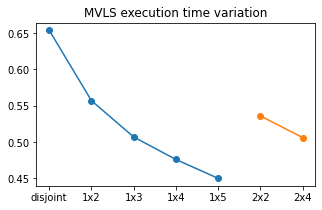

In [91]:
uno = ['disjoint', '1x2', '1x3', '1x4', '1x5']
due = ['2x2', '2x4']
plt.figure(figsize = [5, 3])

plt.title("MVLS execution time variation")
plt.plot(uno, d.loc["time"][uno], "o-")
plt.plot(due, d.loc["time"][due], "o-")
plt.show()


In [61]:
ben_real = pd.read_csv("../Dati/altro/benchmark.csv", delimiter=";", encoding = "ISO-8859-1", index_col=0)
ben_synt = pd.read_csv("../Dati/altro/synt_benchmark.csv", delimiter=";", encoding = "ISO-8859-1", index_col=0)

real_greedy = list(ben_real.loc["greedy"])
real_ls = list(ben_real.loc["LS"])
real_opt = list(ben_real.loc["2opt"])

synt_greedy = list(ben_synt.loc["greedy"])
synt_ls = list(ben_synt.loc["LS"])
synt_opt = list(ben_synt.loc["2opt"])

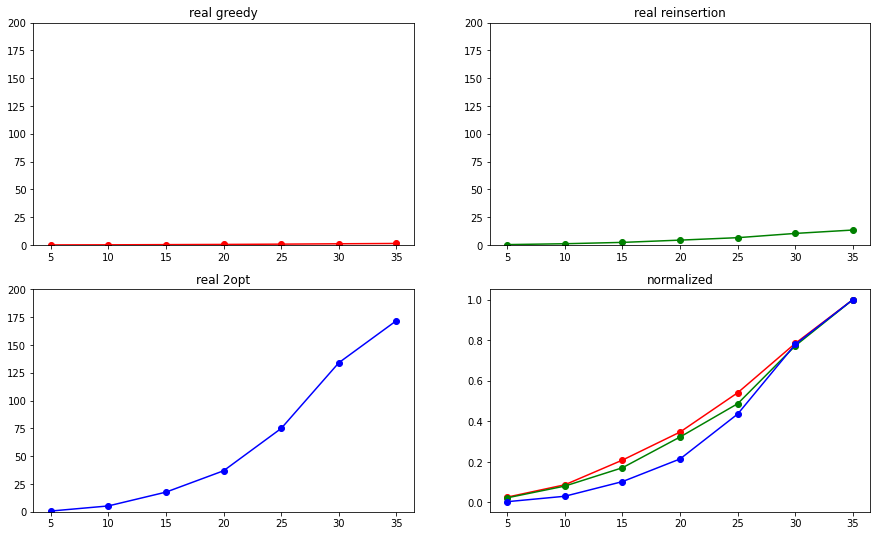

In [62]:
plt.figure(figsize = [15,9])
plt.subplot(221)
plt.title("real greedy")
plt.plot(ben_real.columns, real_greedy, "ro-")
plt.ylim(0,200)
plt.subplot(222)
plt.title("real reinsertion")
plt.plot(ben_real.columns, real_ls, "go-")
plt.ylim(0,200)
plt.subplot(223)
plt.title("real 2opt")
plt.plot(ben_real.columns, real_opt, "bo-")
plt.ylim(0,200)
plt.subplot(224)
plt.title("normalized")
plt.plot(ben_real.columns, np.asarray(real_greedy)/max(real_greedy), "ro-")
plt.plot(ben_real.columns, np.asarray(real_ls)/max(real_ls), "go-")
plt.plot(ben_real.columns, np.asarray(real_opt)/max(real_opt), "bo-")
plt.show()

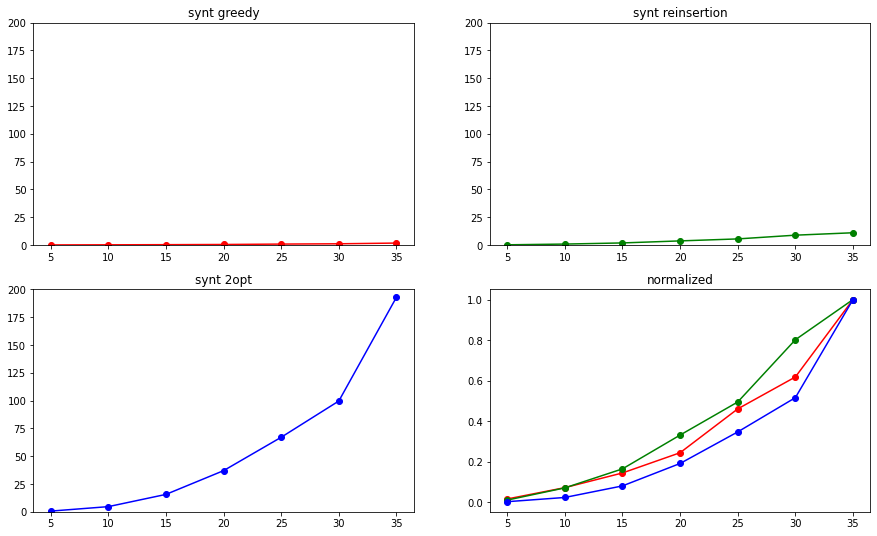

In [63]:
plt.figure(figsize = [15,9])
plt.subplot(221)
plt.title("synt greedy")
plt.plot(ben_synt.columns, synt_greedy, "ro-")
plt.ylim(0,200)
plt.subplot(222)
plt.title("synt reinsertion")
plt.plot(ben_synt.columns, synt_ls, "go-")
plt.ylim(0,200)
plt.subplot(223)
plt.title("synt 2opt")
plt.plot(ben_synt.columns, synt_opt, "bo-")
plt.ylim(0,200)
plt.subplot(224)
plt.title("normalized")
plt.plot(ben_real.columns, np.asarray(synt_greedy)/max(synt_greedy), "ro-")
plt.plot(ben_real.columns, np.asarray(synt_ls)/max(synt_ls), "go-")
plt.plot(ben_real.columns, np.asarray(synt_opt)/max(synt_opt), "bo-")
plt.show()

In [109]:
improv = ["greedy-ls", "ls-2opt", "2opt-mvls"]
greedy = pd.read_csv("../Dati/altro/improvement_table/greedy_improvement_tot.csv", delimiter=";", encoding = "ISO-8859-1", index_col=0).loc[improv]
oss = pd.read_csv("../Dati/altro/improvement_table/oss_improvement_tot.csv", delimiter=";", encoding = "ISO-8859-1", index_col=0).loc[improv]
foss = pd.read_csv("../Dati/altro/improvement_table/foss_improvement_tot.csv", delimiter=";", encoding = "ISO-8859-1", index_col=0).loc[improv]
randomschedule = pd.read_csv("../Dati/altro/improvement_table/randomschedule_improvement_tot.csv", delimiter=";", encoding = "ISO-8859-1", index_col=0).loc[improv]
df = pd.concat([greedy, oss, foss, randomschedule], axis = 1)
df.columns = ["greedy", "oss", "foss", "radomschedule"]

g_ls = round((sum(df.loc["greedy-ls"])/4)*100, 3)
l_opt = round((sum(df.loc["ls-2opt"])/4)*100, 3)
opt_mvls = round((sum(df.loc["2opt-mvls"])/4)*100, 3)
print(f"avg improvement ls-greedy: {g_ls}%, 2opt-ls: {l_opt}%, mvls-2opt: {opt_mvls}%")

avg improvement ls-greedy: 3.825%, 2opt-ls: 7.9%, mvls-2opt: 7.175%


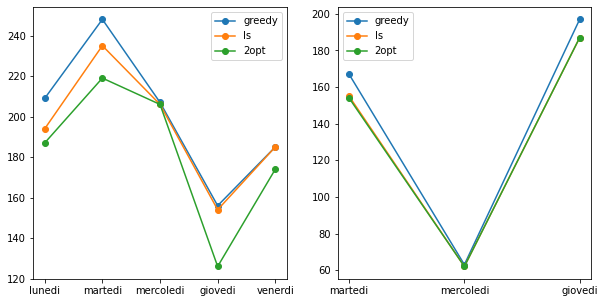

In [121]:
fur1 = pd.read_csv("../Dati/altro/improvement_table/greedy_improvement_table1.csv", delimiter=";", encoding = "ISO-8859-1", index_col=0)
fur2 = pd.read_csv("../Dati/altro/improvement_table/greedy_improvement_table2.csv", delimiter=";", encoding = "ISO-8859-1", index_col=0)
algs = ["greedy", "ls", "2opt"]
plt.figure(figsize = [10, 5])
plt.subplot(121)
for i in algs:
    plt.plot(fur1.columns[:len(fur1.columns)-1], fur1.loc[i][fur1.columns[:len(fur1.columns)-1]], "o-")
plt.legend(algs)
plt.subplot(122)
for i in algs:
    plt.plot(fur2.columns[:len(fur2.columns)-1], fur2.loc[i][fur2.columns[:len(fur2.columns)-1]], "o-")
plt.legend(algs)
plt.show()